## Notebook to mosaic images captured on the same day

Rainey Aberle & Jukes Liu

January 2022

In [1]:
import os
import rasterio as rio
import numpy as np
import glob
import subprocess
from osgeo import gdal
from xml.dom import minidom
from rasterio.plot import show
import matplotlib.pyplot as plt

In [2]:
### ---path to images--- ###
impath = '/Users/raineyaberle/Research/PhD/Wolverine/imagery/Planet/2021-04-20_2021-08-25/PSScene4Band/'

### ---path for output images--- ###
outpath = '/Users/raineyaberle/Research/PhD/Wolverine/imagery/Planet/2021-04-20_2021-08-25/'

### ---extension for mosaicing--- ###
ext = 'SR_clip'

### Mosaic reflectance image files

In [3]:
uniquescenes = [] # grab unique scenes from a folder with all scenefiles
for scene in os.listdir(impath):
    date = scene[0:8]
    uniquescenes.append(date)
uniquescenes = list(set(uniquescenes))
uniquescenes.sort() # sort chronologically
uniquescenes

['20210421',
 '20210422',
 '20210423',
 '20210424',
 '20210425',
 '20210426',
 '20210427',
 '20210429',
 '20210501',
 '20210507',
 '20210517',
 '20210518',
 '20210524',
 '20210605',
 '20210606',
 '20210611',
 '20210612',
 '20210613',
 '20210614',
 '20210615',
 '20210629',
 '20210630',
 '20210701',
 '20210704',
 '20210714',
 '20210715',
 '20210716',
 '20210717',
 '20210718',
 '20210719',
 '20210726',
 '20210731',
 '20210801',
 '20210802',
 '20210813',
 '20210815',
 '20210816',
 '20210818',
 '20210821']

In [4]:
# make directory for SR stitched outputs
stitch_path = outpath+'SR-stitched/'
if os.path.isdir(stitch_path)==0:
    os.mkdir(stitch_path)
    print(stitch_path+' directory made')

# loop through unique scenes
for scene in uniquescenes:
    filepaths = [] # files from the same date to mosaic together
    for file in os.listdir(impath): # check all files
        if (scene in file) & (ext in file): # if they match the scene date and have the right extension
            filepaths.append(impath+file) # add the path to the file
    
    # construct the gdal_merge command
    cmd = 'gdal_merge.py -v '

    # add in input files
    for filepath in filepaths:
        cmd += filepath+' '
    
    # define the out path with correct extension
    if ext == 'DN_udm':
        out = os.path.join(stitch_path, scene + "_DN_mask.tif")
    elif ext == 'udm2':
        out = os.path.join(stitch_path, scene + "_mask.tif")
    else:
        out = os.path.join(stitch_path, scene + ".tif")

    cmd += '-o '+out

    # Run the command 
    p = subprocess.run(cmd, shell=True, capture_output=True) 
    print(p)

/Users/raineyaberle/Research/PhD/Wolverine/imagery/Planet/2021-04-20_2021-08-25/SR-stitched/ directory made
CompletedProcess(args='gdal_merge.py -v /Users/raineyaberle/Research/PhD/Wolverine/imagery/Planet/2021-04-20_2021-08-25/PSScene4Band/20210421_165659_0f21_3B_AnalyticMS_SR_clip.tif /Users/raineyaberle/Research/PhD/Wolverine/imagery/Planet/2021-04-20_2021-08-25/PSScene4Band/20210421_211435_88_2254_3B_AnalyticMS_SR_clip.tif /Users/raineyaberle/Research/PhD/Wolverine/imagery/Planet/2021-04-20_2021-08-25/PSScene4Band/20210421_165700_0f21_3B_AnalyticMS_SR_clip.tif /Users/raineyaberle/Research/PhD/Wolverine/imagery/Planet/2021-04-20_2021-08-25/PSScene4Band/20210421_165658_0f21_3B_AnalyticMS_SR_clip.tif /Users/raineyaberle/Research/PhD/Wolverine/imagery/Planet/2021-04-20_2021-08-25/PSScene4Band/20210421_202734_37_2423_3B_AnalyticMS_SR_clip.tif /Users/raineyaberle/Research/PhD/Wolverine/imagery/Planet/2021-04-20_2021-08-25/PSScene4Band/20210421_211433_53_2254_3B_AnalyticMS_SR_clip.tif -o 

CompletedProcess(args='gdal_merge.py -v /Users/raineyaberle/Research/PhD/Wolverine/imagery/Planet/2021-04-20_2021-08-25/PSScene4Band/20210424_202443_93_2431_3B_AnalyticMS_SR_clip.tif -o /Users/raineyaberle/Research/PhD/Wolverine/imagery/Planet/2021-04-20_2021-08-25/SR-stitched/20210424.tif', returncode=0, stdout=b'\nProcessing file     1 of     1,  0.000% completed in 0 minutes.\nFilename: /Users/raineyaberle/Research/PhD/Wolverine/imagery/Planet/2021-04-20_2021-08-25/PSScene4Band/20210424_202443_93_2431_3B_AnalyticMS_SR_clip.tif\nFile Size: 638x3860x4\nPixel Size: 3.000000 x -3.000000\nUL:(391020.000000,6703608.000000)   LR:(392934.000000,6692028.000000)\nCopy 0,0,638,3860 to 0,0,638,3860.\nCopy 0,0,638,3860 to 0,0,638,3860.\nCopy 0,0,638,3860 to 0,0,638,3860.\nCopy 0,0,638,3860 to 0,0,638,3860.\n', stderr=b'')
CompletedProcess(args='gdal_merge.py -v /Users/raineyaberle/Research/PhD/Wolverine/imagery/Planet/2021-04-20_2021-08-25/PSScene4Band/20210425_165654_1050_3B_AnalyticMS_SR_clip.

CompletedProcess(args='gdal_merge.py -v /Users/raineyaberle/Research/PhD/Wolverine/imagery/Planet/2021-04-20_2021-08-25/PSScene4Band/20210427_194054_25_106d_3B_AnalyticMS_SR_clip.tif /Users/raineyaberle/Research/PhD/Wolverine/imagery/Planet/2021-04-20_2021-08-25/PSScene4Band/20210427_194055_78_106d_3B_AnalyticMS_SR_clip.tif -o /Users/raineyaberle/Research/PhD/Wolverine/imagery/Planet/2021-04-20_2021-08-25/SR-stitched/20210427.tif', returncode=0, stdout=b'\nProcessing file     1 of     2,  0.000% completed in 0 minutes.\nFilename: /Users/raineyaberle/Research/PhD/Wolverine/imagery/Planet/2021-04-20_2021-08-25/PSScene4Band/20210427_194054_25_106d_3B_AnalyticMS_SR_clip.tif\nFile Size: 1408x1302x4\nPixel Size: 3.000000 x -3.000000\nUL:(391020.000000,6695868.000000)   LR:(395244.000000,6691962.000000)\nCopy 0,0,1408,1302 to 0,2580,1408,1302.\nCopy 0,0,1408,1302 to 0,2580,1408,1302.\nCopy 0,0,1408,1302 to 0,2580,1408,1302.\nCopy 0,0,1408,1302 to 0,2580,1408,1302.\n\nProcessing file     2 of 

CompletedProcess(args='gdal_merge.py -v /Users/raineyaberle/Research/PhD/Wolverine/imagery/Planet/2021-04-20_2021-08-25/PSScene4Band/20210518_211339_01_2401_3B_AnalyticMS_SR_clip.tif /Users/raineyaberle/Research/PhD/Wolverine/imagery/Planet/2021-04-20_2021-08-25/PSScene4Band/20210518_211341_30_2401_3B_AnalyticMS_SR_clip.tif -o /Users/raineyaberle/Research/PhD/Wolverine/imagery/Planet/2021-04-20_2021-08-25/SR-stitched/20210518.tif', returncode=0, stdout=b'\nProcessing file     1 of     2,  0.000% completed in 0 minutes.\nFilename: /Users/raineyaberle/Research/PhD/Wolverine/imagery/Planet/2021-04-20_2021-08-25/PSScene4Band/20210518_211339_01_2401_3B_AnalyticMS_SR_clip.tif\nFile Size: 2679x3262x4\nPixel Size: 3.000000 x -3.000000\nUL:(391071.000000,6703608.000000)   LR:(399108.000000,6693822.000000)\nCopy 0,0,2679,3262 to 17,0,2679,3262.\nCopy 0,0,2679,3262 to 17,0,2679,3262.\nCopy 0,0,2679,3262 to 17,0,2679,3262.\nCopy 0,0,2679,3262 to 17,0,2679,3262.\n\nProcessing file     2 of     2, 5

CompletedProcess(args='gdal_merge.py -v /Users/raineyaberle/Research/PhD/Wolverine/imagery/Planet/2021-04-20_2021-08-25/PSScene4Band/20210611_193902_91_106e_3B_AnalyticMS_SR_clip.tif /Users/raineyaberle/Research/PhD/Wolverine/imagery/Planet/2021-04-20_2021-08-25/PSScene4Band/20210611_165003_104b_3B_AnalyticMS_SR_clip.tif /Users/raineyaberle/Research/PhD/Wolverine/imagery/Planet/2021-04-20_2021-08-25/PSScene4Band/20210611_165004_104b_3B_AnalyticMS_SR_clip.tif /Users/raineyaberle/Research/PhD/Wolverine/imagery/Planet/2021-04-20_2021-08-25/PSScene4Band/20210611_165002_104b_3B_AnalyticMS_SR_clip.tif /Users/raineyaberle/Research/PhD/Wolverine/imagery/Planet/2021-04-20_2021-08-25/PSScene4Band/20210611_193904_93_106e_3B_AnalyticMS_SR_clip.tif /Users/raineyaberle/Research/PhD/Wolverine/imagery/Planet/2021-04-20_2021-08-25/PSScene4Band/20210611_205334_1011_3B_AnalyticMS_SR_clip.tif -o /Users/raineyaberle/Research/PhD/Wolverine/imagery/Planet/2021-04-20_2021-08-25/SR-stitched/20210611.tif', retu

CompletedProcess(args='gdal_merge.py -v /Users/raineyaberle/Research/PhD/Wolverine/imagery/Planet/2021-04-20_2021-08-25/PSScene4Band/20210614_164800_0f49_3B_AnalyticMS_SR_clip.tif /Users/raineyaberle/Research/PhD/Wolverine/imagery/Planet/2021-04-20_2021-08-25/PSScene4Band/20210614_205247_1025_3B_AnalyticMS_SR_clip.tif /Users/raineyaberle/Research/PhD/Wolverine/imagery/Planet/2021-04-20_2021-08-25/PSScene4Band/20210614_164801_0f49_3B_AnalyticMS_SR_clip.tif /Users/raineyaberle/Research/PhD/Wolverine/imagery/Planet/2021-04-20_2021-08-25/PSScene4Band/20210614_164759_0f49_3B_AnalyticMS_SR_clip.tif /Users/raineyaberle/Research/PhD/Wolverine/imagery/Planet/2021-04-20_2021-08-25/PSScene4Band/20210614_164758_0f49_3B_AnalyticMS_SR_clip.tif -o /Users/raineyaberle/Research/PhD/Wolverine/imagery/Planet/2021-04-20_2021-08-25/SR-stitched/20210614.tif', returncode=0, stdout=b'\nProcessing file     1 of     5,  0.000% completed in 0 minutes.\nFilename: /Users/raineyaberle/Research/PhD/Wolverine/imagery

CompletedProcess(args='gdal_merge.py -v /Users/raineyaberle/Research/PhD/Wolverine/imagery/Planet/2021-04-20_2021-08-25/PSScene4Band/20210630_205214_1035_3B_AnalyticMS_SR_clip.tif -o /Users/raineyaberle/Research/PhD/Wolverine/imagery/Planet/2021-04-20_2021-08-25/SR-stitched/20210630.tif', returncode=0, stdout=b'\nProcessing file     1 of     1,  0.000% completed in 0 minutes.\nFilename: /Users/raineyaberle/Research/PhD/Wolverine/imagery/Planet/2021-04-20_2021-08-25/PSScene4Band/20210630_205214_1035_3B_AnalyticMS_SR_clip.tif\nFile Size: 2694x3781x4\nPixel Size: 3.000000 x -3.000000\nUL:(391020.000000,6703203.000000)   LR:(399102.000000,6691860.000000)\nCopy 0,0,2694,3781 to 0,0,2694,3781.\nCopy 0,0,2694,3781 to 0,0,2694,3781.\nCopy 0,0,2694,3781 to 0,0,2694,3781.\nCopy 0,0,2694,3781 to 0,0,2694,3781.\n', stderr=b'')
CompletedProcess(args='gdal_merge.py -v /Users/raineyaberle/Research/PhD/Wolverine/imagery/Planet/2021-04-20_2021-08-25/PSScene4Band/20210701_203411_12_2441_3B_AnalyticMS_SR

CompletedProcess(args='gdal_merge.py -v /Users/raineyaberle/Research/PhD/Wolverine/imagery/Planet/2021-04-20_2021-08-25/PSScene4Band/20210715_211159_05_2402_3B_AnalyticMS_SR_clip.tif /Users/raineyaberle/Research/PhD/Wolverine/imagery/Planet/2021-04-20_2021-08-25/PSScene4Band/20210715_204552_1035_3B_AnalyticMS_SR_clip.tif /Users/raineyaberle/Research/PhD/Wolverine/imagery/Planet/2021-04-20_2021-08-25/PSScene4Band/20210715_204553_1035_3B_AnalyticMS_SR_clip.tif /Users/raineyaberle/Research/PhD/Wolverine/imagery/Planet/2021-04-20_2021-08-25/PSScene4Band/20210715_211156_75_2402_3B_AnalyticMS_SR_clip.tif /Users/raineyaberle/Research/PhD/Wolverine/imagery/Planet/2021-04-20_2021-08-25/PSScene4Band/20210715_204551_1035_3B_AnalyticMS_SR_clip.tif -o /Users/raineyaberle/Research/PhD/Wolverine/imagery/Planet/2021-04-20_2021-08-25/SR-stitched/20210715.tif', returncode=0, stdout=b'\nProcessing file     1 of     5,  0.000% completed in 0 minutes.\nFilename: /Users/raineyaberle/Research/PhD/Wolverine/i

CompletedProcess(args='gdal_merge.py -v /Users/raineyaberle/Research/PhD/Wolverine/imagery/Planet/2021-04-20_2021-08-25/PSScene4Band/20210719_205616_68_105c_3B_AnalyticMS_SR_clip.tif -o /Users/raineyaberle/Research/PhD/Wolverine/imagery/Planet/2021-04-20_2021-08-25/SR-stitched/20210719.tif', returncode=0, stdout=b'\nProcessing file     1 of     1,  0.000% completed in 0 minutes.\nFilename: /Users/raineyaberle/Research/PhD/Wolverine/imagery/Planet/2021-04-20_2021-08-25/PSScene4Band/20210719_205616_68_105c_3B_AnalyticMS_SR_clip.tif\nFile Size: 2696x3916x4\nPixel Size: 3.000000 x -3.000000\nUL:(391020.000000,6703608.000000)   LR:(399108.000000,6691860.000000)\nCopy 0,0,2696,3916 to 0,0,2696,3916.\nCopy 0,0,2696,3916 to 0,0,2696,3916.\nCopy 0,0,2696,3916 to 0,0,2696,3916.\nCopy 0,0,2696,3916 to 0,0,2696,3916.\n', stderr=b'')
CompletedProcess(args='gdal_merge.py -v /Users/raineyaberle/Research/PhD/Wolverine/imagery/Planet/2021-04-20_2021-08-25/PSScene4Band/20210726_204317_100c_3B_AnalyticMS

CompletedProcess(args='gdal_merge.py -v /Users/raineyaberle/Research/PhD/Wolverine/imagery/Planet/2021-04-20_2021-08-25/PSScene4Band/20210801_164622_104a_3B_AnalyticMS_SR_clip.tif /Users/raineyaberle/Research/PhD/Wolverine/imagery/Planet/2021-04-20_2021-08-25/PSScene4Band/20210801_193330_13_106d_3B_AnalyticMS_SR_clip.tif /Users/raineyaberle/Research/PhD/Wolverine/imagery/Planet/2021-04-20_2021-08-25/PSScene4Band/20210801_210819_89_240c_3B_AnalyticMS_SR_clip.tif /Users/raineyaberle/Research/PhD/Wolverine/imagery/Planet/2021-04-20_2021-08-25/PSScene4Band/20210801_193327_08_106d_3B_AnalyticMS_SR_clip.tif /Users/raineyaberle/Research/PhD/Wolverine/imagery/Planet/2021-04-20_2021-08-25/PSScene4Band/20210801_202256_48_2456_3B_AnalyticMS_SR_clip.tif /Users/raineyaberle/Research/PhD/Wolverine/imagery/Planet/2021-04-20_2021-08-25/PSScene4Band/20210801_204541_1003_3B_AnalyticMS_SR_clip.tif /Users/raineyaberle/Research/PhD/Wolverine/imagery/Planet/2021-04-20_2021-08-25/PSScene4Band/20210801_164620

CompletedProcess(args='gdal_merge.py -v /Users/raineyaberle/Research/PhD/Wolverine/imagery/Planet/2021-04-20_2021-08-25/PSScene4Band/20210813_204649_1012_3B_AnalyticMS_SR_clip.tif -o /Users/raineyaberle/Research/PhD/Wolverine/imagery/Planet/2021-04-20_2021-08-25/SR-stitched/20210813.tif', returncode=0, stdout=b'\nProcessing file     1 of     1,  0.000% completed in 0 minutes.\nFilename: /Users/raineyaberle/Research/PhD/Wolverine/imagery/Planet/2021-04-20_2021-08-25/PSScene4Band/20210813_204649_1012_3B_AnalyticMS_SR_clip.tif\nFile Size: 2645x2135x4\nPixel Size: 3.000000 x -3.000000\nUL:(391173.000000,6703608.000000)   LR:(399108.000000,6697203.000000)\nCopy 0,0,2645,2135 to 0,0,2645,2135.\nCopy 0,0,2645,2135 to 0,0,2645,2135.\nCopy 0,0,2645,2135 to 0,0,2645,2135.\nCopy 0,0,2645,2135 to 0,0,2645,2135.\n', stderr=b'')
CompletedProcess(args='gdal_merge.py -v /Users/raineyaberle/Research/PhD/Wolverine/imagery/Planet/2021-04-20_2021-08-25/PSScene4Band/20210815_202830_37_225a_3B_AnalyticMS_SR

CompletedProcess(args='gdal_merge.py -v /Users/raineyaberle/Research/PhD/Wolverine/imagery/Planet/2021-04-20_2021-08-25/PSScene4Band/20210818_164255_104e_3B_AnalyticMS_SR_clip.tif /Users/raineyaberle/Research/PhD/Wolverine/imagery/Planet/2021-04-20_2021-08-25/PSScene4Band/20210818_204911_1014_3B_AnalyticMS_SR_clip.tif /Users/raineyaberle/Research/PhD/Wolverine/imagery/Planet/2021-04-20_2021-08-25/PSScene4Band/20210818_164256_104e_3B_AnalyticMS_SR_clip.tif /Users/raineyaberle/Research/PhD/Wolverine/imagery/Planet/2021-04-20_2021-08-25/PSScene4Band/20210818_204910_1014_3B_AnalyticMS_SR_clip.tif /Users/raineyaberle/Research/PhD/Wolverine/imagery/Planet/2021-04-20_2021-08-25/PSScene4Band/20210818_204909_1014_3B_AnalyticMS_SR_clip.tif -o /Users/raineyaberle/Research/PhD/Wolverine/imagery/Planet/2021-04-20_2021-08-25/SR-stitched/20210818.tif', returncode=0, stdout=b'\nProcessing file     1 of     5,  0.000% completed in 0 minutes.\nFilename: /Users/raineyaberle/Research/PhD/Wolverine/imagery

In [5]:
# Print files in outpath to verify
os.listdir(stitch_path)

['20210518.tif',
 '20210524.tif',
 '20210726.tif',
 '20210719.tif',
 '20210731.tif',
 '20210718.tif',
 '20210802.tif',
 '20210816.tif',
 '20210427.tif',
 '20210426.tif',
 '20210630.tif',
 '20210815.tif',
 '20210801.tif',
 '20210424.tif',
 '20210425.tif',
 '20210421.tif',
 '20210813.tif',
 '20210422.tif',
 '20210423.tif',
 '20210611.tif',
 '20210605.tif',
 '20210613.tif',
 '20210606.tif',
 '20210612.tif',
 '20210821.tif',
 '20210429.tif',
 '20210818.tif',
 '20210615.tif',
 '20210629.tif',
 '20210614.tif',
 '20210704.tif',
 '20210507.tif',
 '20210517.tif',
 '20210701.tif',
 '20210715.tif',
 '20210714.tif',
 '20210716.tif',
 '20210717.tif',
 '20210501.tif']

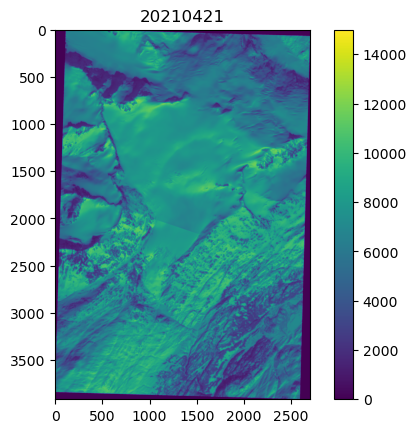

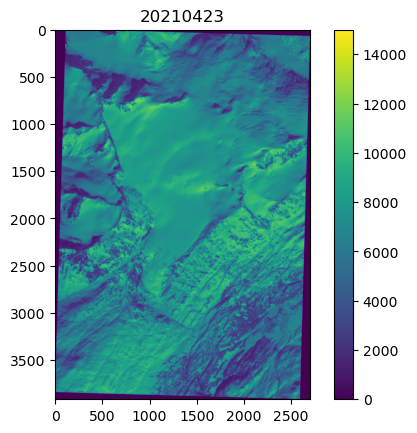

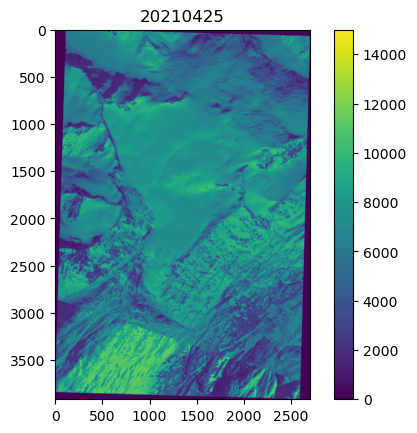

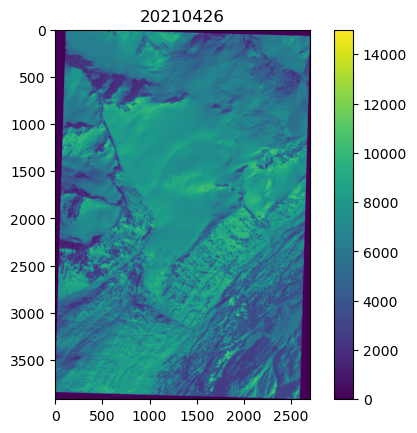

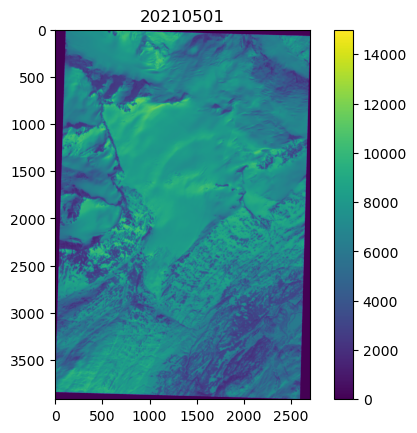

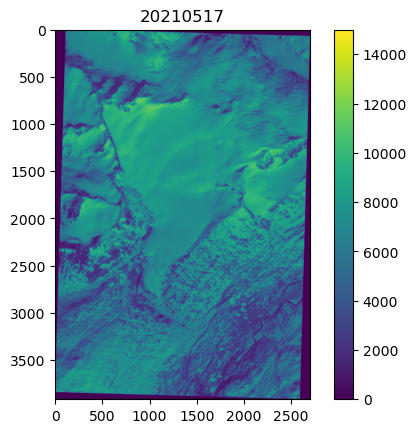

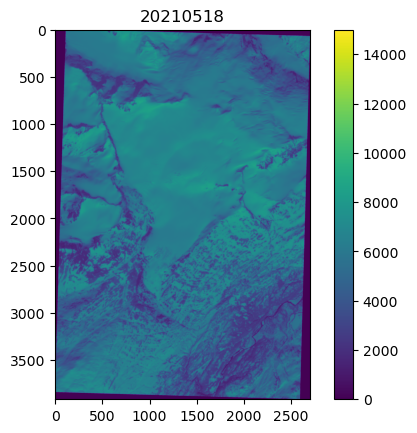

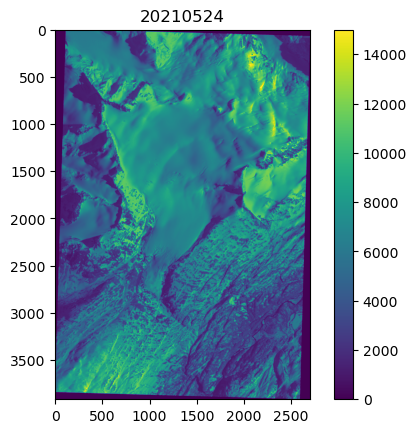

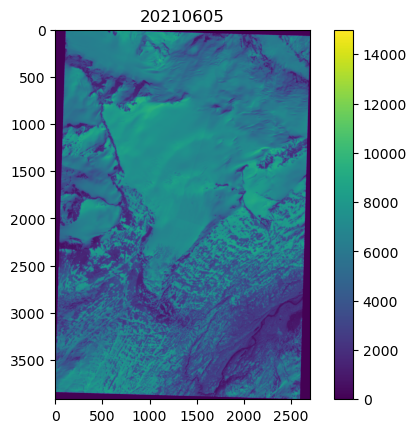

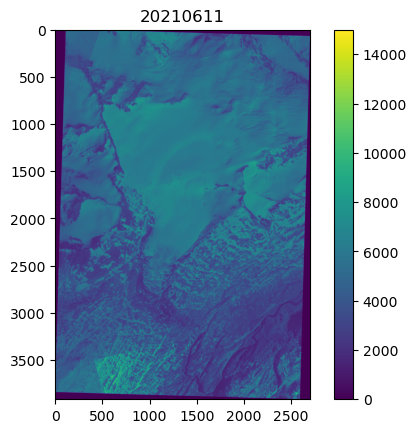

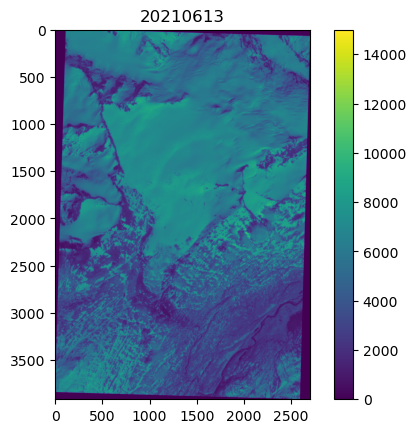

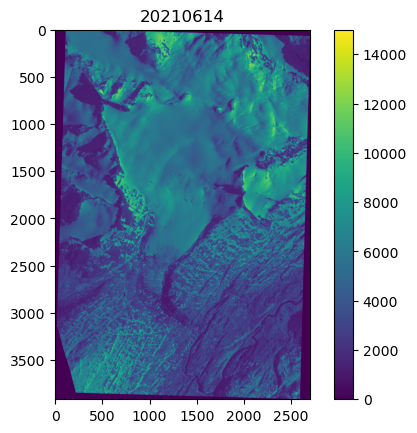

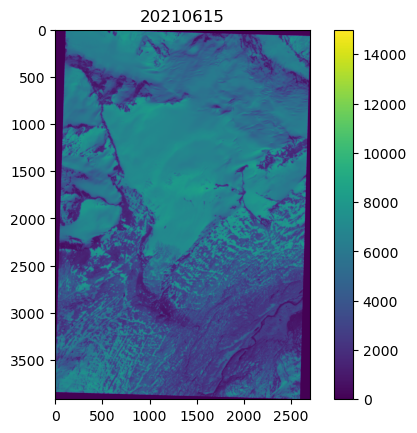

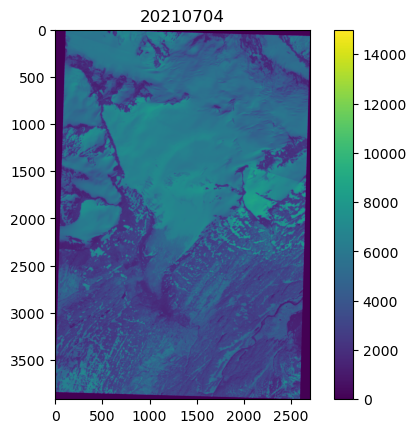

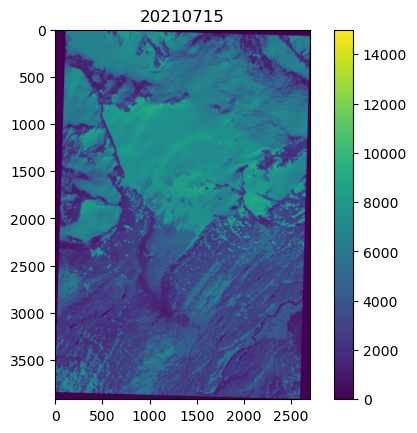

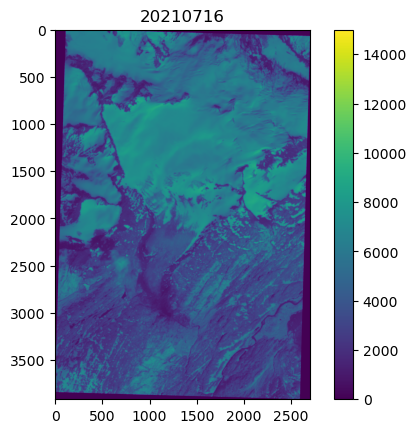

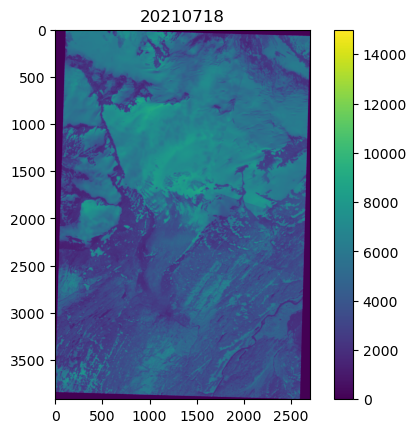

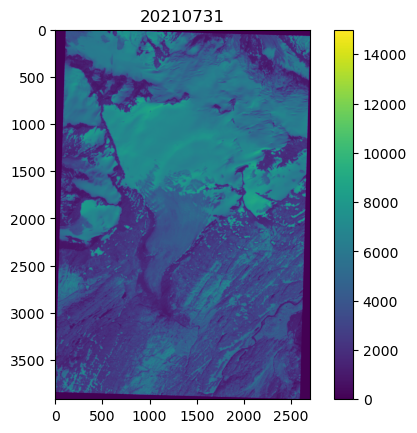

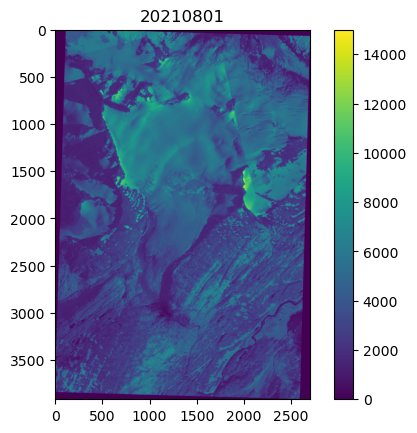

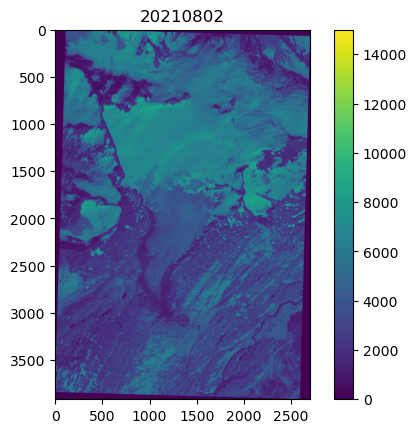

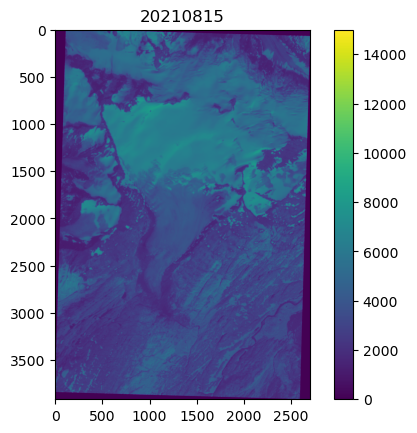

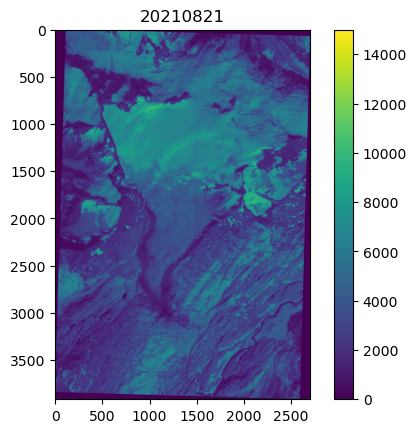

In [7]:
# Plot image mosaics to preview
os.chdir(stitch_path)
im_names = glob.glob('*.tif')
im_names.sort()
for im_name in im_names:
    im = rio.open(im_name)
    n = im.read(4)
    plt.title(im_name[0:8])
    plt.imshow(n)
    plt.clim(0,15000)
    plt.colorbar()
    plt.show()

### Done!